In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
df=pd.read_csv("AAPL.csv")
df.set_index('Date', inplace=True)

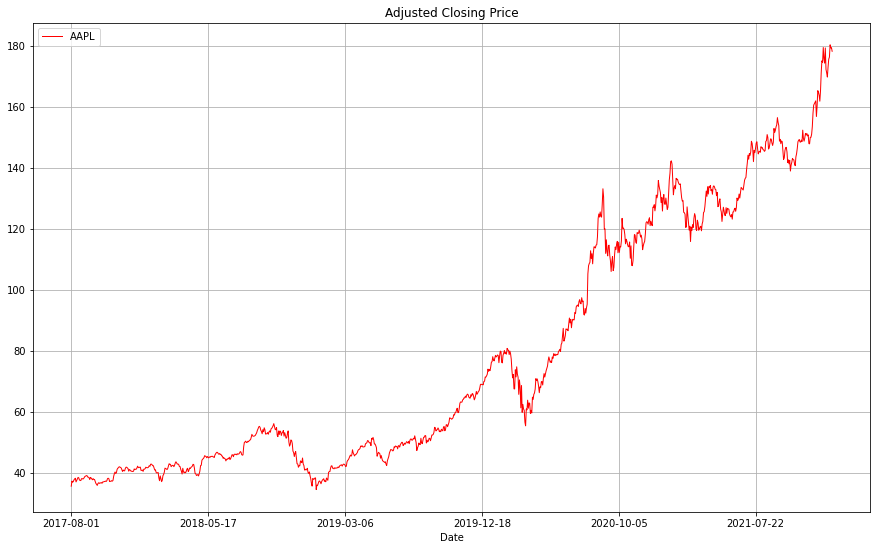

In [3]:
df['Adj Close'].plot(label='AAPL', figsize=(15, 9), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [4]:
close_col = df['Adj Close']
mvag = close_col.rolling(window=100).mean()  

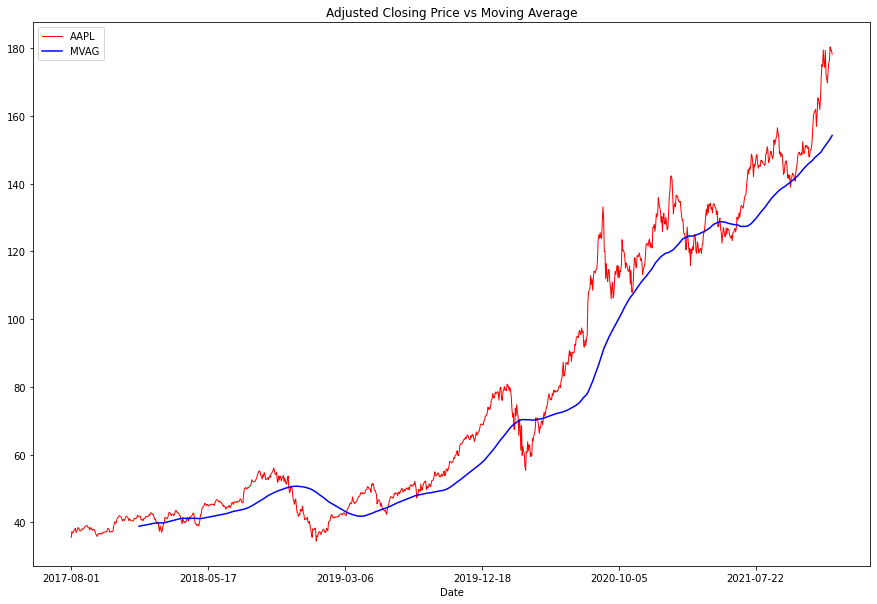

In [5]:
df['Adj Close'].plot(label='AAPL', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

In [6]:
predict_days = 30

In [7]:
df['Prediction'] = df['Adj Close'].shift(-predict_days)

In [8]:
X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(1083, 6)


In [9]:
y = np.array(df['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(1083,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(866, 6)
(866,)
(217, 6)
(217,)


In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [12]:
linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.9644767310891393


In [13]:
X_predict = np.array(df.drop(['Prediction'], 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))

<ipython-input-13-9032b92a972c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_predict = np.array(df.drop(['Prediction'], 1))[-predict_days:]
<ipython-input-13-9032b92a972c>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))


In [14]:
predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

In [32]:
predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

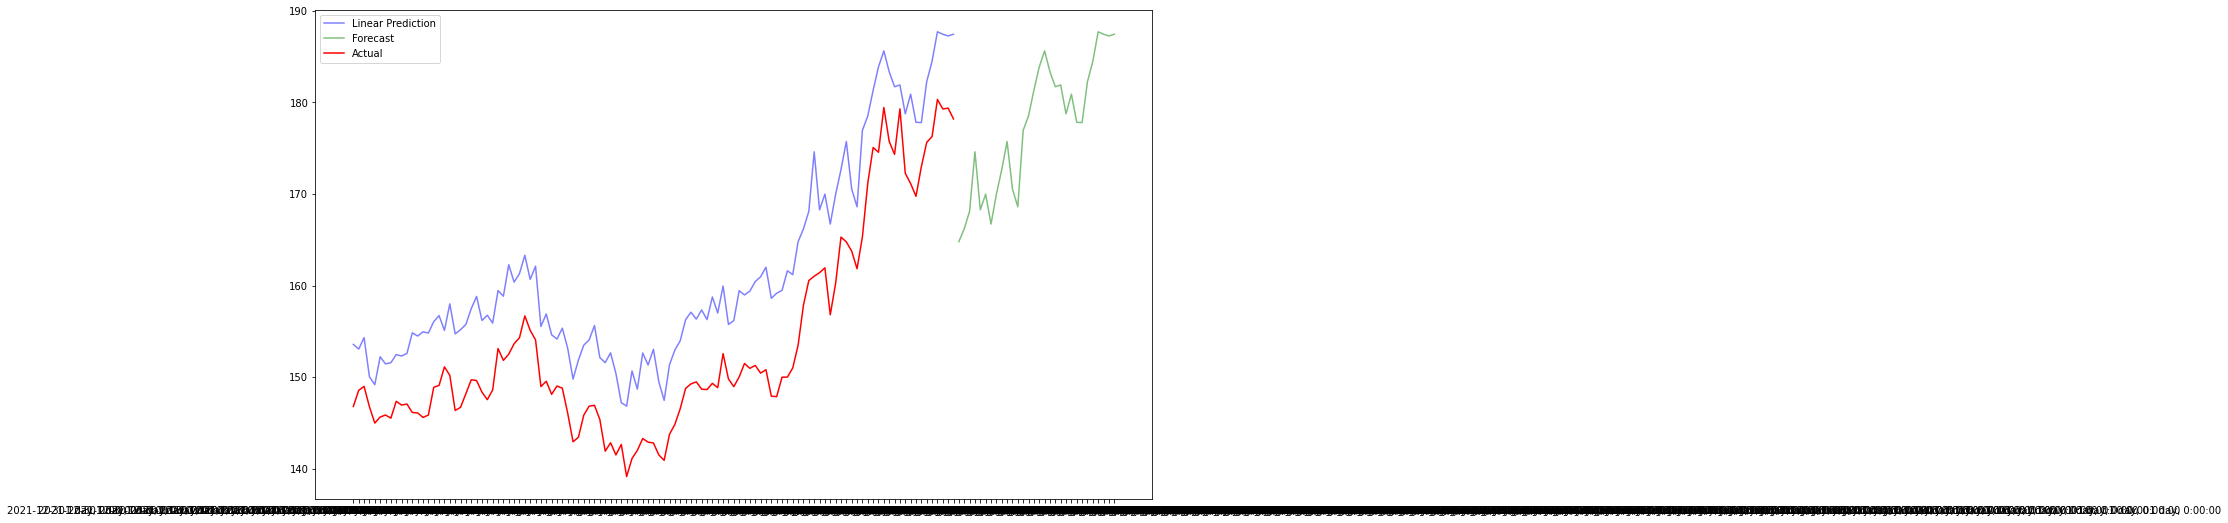

In [33]:
plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

In [16]:

df['difference']= df['High']-df['Low']

result=[]
for open,close in zip(df['Open'],df['Close']):
    if (open > close): 
        result.append(0)
    else: 
        result.append(1)
df['Result']=result

In [17]:
X= df[['Open', 'High', 'Low','Volume']]
y=df['Adj Close']
         

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

In [19]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
lm= linear_model.LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
print(lm.coef_)

[-5.95451723e-01  9.11764785e-01  6.92549699e-01 -1.76348851e-09]


In [23]:
print(lm.intercept_)

-1.7555945713748287


In [24]:
predict= lm.predict(X_test)

In [25]:
print(X_test)

                  Open        High         Low     Volume
Date                                                     
2021-01-26  143.600006  144.300003  141.369995   98390600
2019-04-10   49.669998   50.185001   49.544998   86781200
2018-04-27   41.000000   41.082500   40.157501  142623200
2021-11-26  159.570007  160.449997  156.360001   76959800
2020-07-22   96.692497   97.974998   96.602501   89001600
...                ...         ...         ...        ...
2019-11-20   66.385002   66.519997   65.099998  106234400
2021-03-10  121.690002  122.169998  119.449997  111943300
2018-08-17   53.360001   54.487499   53.290001  141708000
2021-07-13  144.029999  147.460007  143.630005  100827100
2017-12-22   43.669998   43.855000   43.625000   65397600

[279 rows x 4 columns]


In [26]:
predict.shape

(279,)

In [27]:
dframe=pd.DataFrame(y_test,predict)

In [28]:
dfr= pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [29]:
print(dfr)

            Actual Price  Predicted Price
Date                                     
2021-01-26    142.282852       142.037432
2019-04-10     48.898159        48.584572
2018-04-27     38.969707        38.848012
2021-11-26    156.809998       157.672181
2020-07-22     96.336296        96.743924
...                  ...              ...
2019-11-20     64.834442        64.263573
2021-03-10    119.423073       119.701835
2018-08-17     52.621830        52.806957
2021-07-13    145.210190       146.223445
2017-12-22     41.845703        42.323627

[279 rows x 2 columns]


In [30]:
lm.score(X_test,y_test)

0.9997576110106915

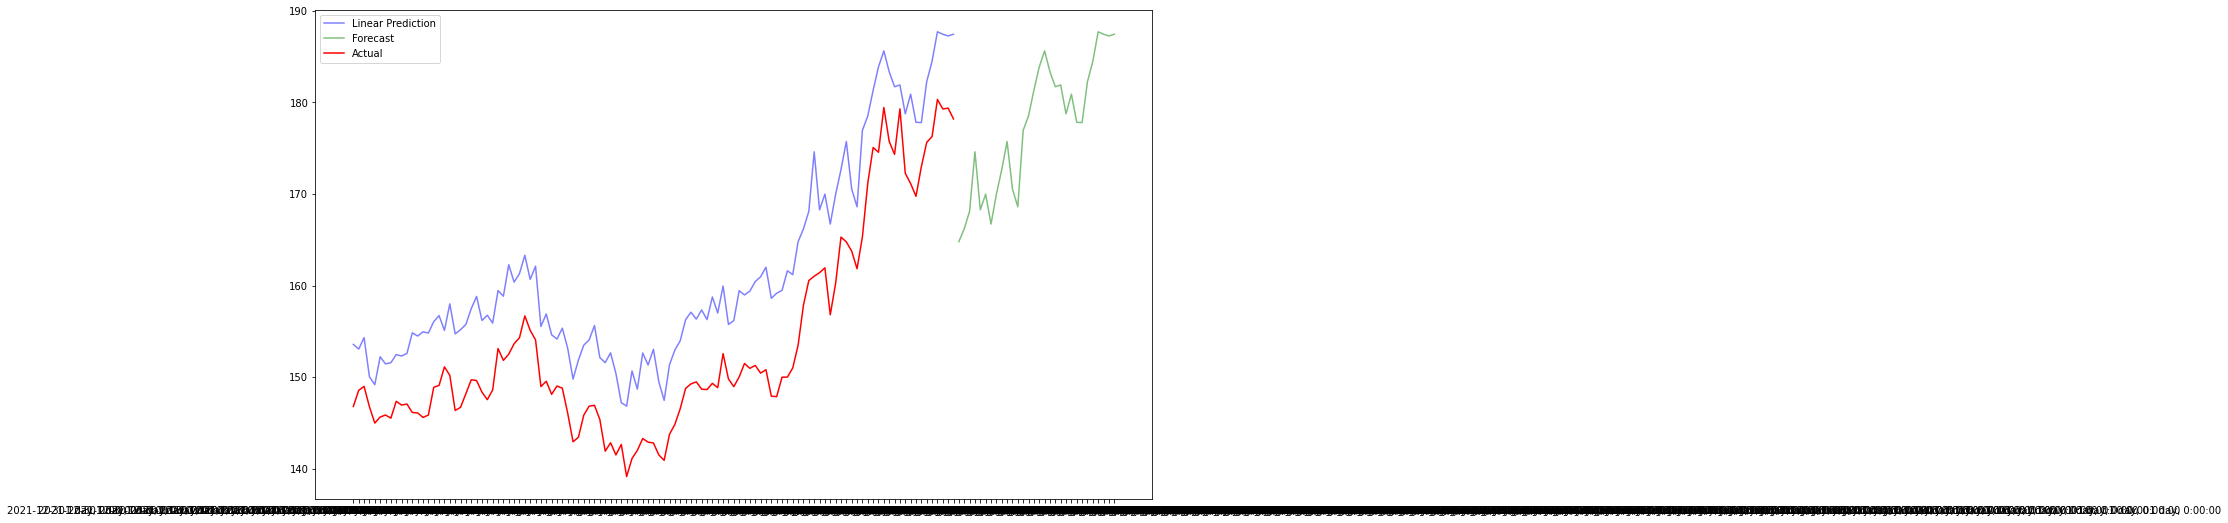

In [31]:
plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()